In [1]:
#Predict whether passenger survives or not

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from pandas import DataFrame 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
#load dataset
data = pd.read_csv(r'C:\Users\S Moyo\Downloads\all\train.csv')

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.shape

(891, 12)

In [6]:
data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25    

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df.isnull().values.any()

True

In [10]:
df = df.dropna()

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


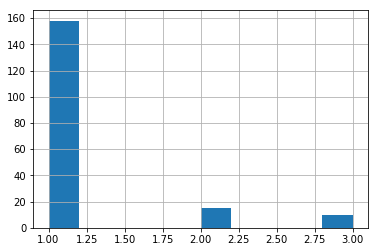

In [12]:
df["Pclass"].hist()

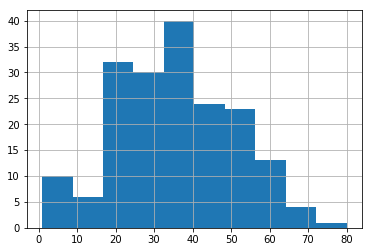

In [13]:
df.Age.hist()

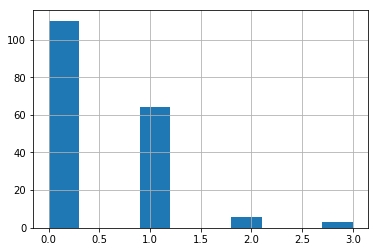

In [14]:
df.SibSp.hist()

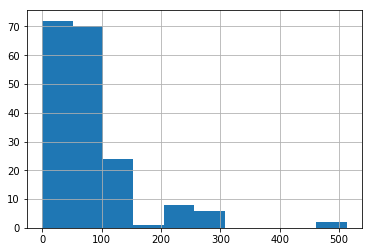

In [15]:
df.Fare.hist()

In [16]:
darr = np.array(df)

In [17]:
darr

array([[2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [4, 1, 1, ..., 53.1, 'C123', 'S'],
       [7, 0, 1, ..., 51.8625, 'E46', 'S'],
       ..., 
       [880, 1, 1, ..., 83.1583, 'C50', 'C'],
       [888, 1, 1, ..., 30.0, 'B42', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C']], dtype=object)

In [34]:
Pclass = df["Pclass"]
Name = pd.get_dummies(df["Name"])
Sex = pd.get_dummies(df["Sex"])
Ticket = pd.get_dummies(df["Ticket"])
Cabin = pd.get_dummies(df["Cabin"])
Embarked = pd.get_dummies(df["Embarked"])

In [45]:
x = pd.get_dummies(df[["PassengerId","Pclass","Name","Sex","Ticket","Cabin","Embarked"]])
y = df["Survived"]
#x = [Pclass,Name,Sex,Ticket,Cabin,Embarked]

In [46]:
x

,PassengerId,Pclass,"Name_Allen, Miss. Elisabeth Walton","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Anderson, Mr. Harry","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,11,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,22,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54,55,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
y

1      1
3      1
6      0
10     1
11     1
21     1
23     1
27     0
52     1
54     0
62     0
66     1
75     0
88     1
92     0
96     0
97     1
102    0
110    0
118    0
123    1
124    0
136    1
137    0
139    0
148    0
151    1
170    0
174    0
177    0
      ..
737    1
741    0
742    1
745    0
748    0
751    1
759    1
763    1
765    1
772    0
779    1
781    1
782    0
789    0
796    1
802    1
806    0
809    1
820    1
823    1
835    1
853    1
857    1
862    1
867    0
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [48]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [49]:
lg = LogisticRegression()

In [50]:
reg = lg.fit(xTrain, yTrain)

In [51]:
survived_class = lg.predict(xTest)

In [52]:
survived_class

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
print('Coefficients: \n', lg.coef_)

Coefficients: 
 [[ 0.00164071 -0.19093878  0.04651604  0.         -0.43047339 -0.48983944
   0.33663978  0.0868763   0.          0.0641686   0.04411893  0.06653639
   0.          0.29978522 -0.22865636  0.10225713  0.          0.41351587
   0.0415013   0.38409709  0.          0.          0.22114158  0.28719482
   0.0551659   0.08925559  0.34326368 -0.22588179  0.36375703  0.
   0.08428071  0.08595814  0.08823389  0.07394706 -0.2648086   0.
   0.27902194 -0.37018058  0.18388713  0.03958677  0.28294182  0.02419798
  -0.30762189 -0.18076802  0.27055459  0.03282397  0.09086819 -0.29087287
   0.         -0.30847768  0.          0.11052333  0.25269907 -0.29276589
   0.28708397  0.          0.33994757 -0.29295008  0.05555248  0.27053239
   0.04310407  0.05600577  0.2764216   0.          0.          0.15680544
   0.         -0.27859692  0.0649636   0.05683668  0.28165711 -0.21953948
   0.15968338 -0.24990935 -0.17946971  0.         -0.20416276  0.0416356
   0.          0.08702851  0.3890813  -

In [56]:
reg.score(x,y)

0.96174863387978138

In [69]:
lg.coef_

array([[ 0.00164071, -0.19093878,  0.04651604,  0.        , -0.43047339,
        -0.48983944,  0.33663978,  0.0868763 ,  0.        ,  0.0641686 ,
         0.04411893,  0.06653639,  0.        ,  0.29978522, -0.22865636,
         0.10225713,  0.        ,  0.41351587,  0.0415013 ,  0.38409709,
         0.        ,  0.        ,  0.22114158,  0.28719482,  0.0551659 ,
         0.08925559,  0.34326368, -0.22588179,  0.36375703,  0.        ,
         0.08428071,  0.08595814,  0.08823389,  0.07394706, -0.2648086 ,
         0.        ,  0.27902194, -0.37018058,  0.18388713,  0.03958677,
         0.28294182,  0.02419798, -0.30762189, -0.18076802,  0.27055459,
         0.03282397,  0.09086819, -0.29087287,  0.        , -0.30847768,
         0.        ,  0.11052333,  0.25269907, -0.29276589,  0.28708397,
         0.        ,  0.33994757, -0.29295008,  0.05555248,  0.27053239,
         0.04310407,  0.05600577,  0.2764216 ,  0.        ,  0.        ,
         0.15680544,  0.        , -0.27859692,  0.0